# Incubator project proposal 

For the incubator project at summer 2020, I am interested in implementation of the time series forcasting methods to predict the electrical load, or market price, by considering the metrological conditions.
To start, I have dowloaded two available and considerably related datasets from the Kaggle website. <br>

__ Energy dataset__ <br>
Consist of the hourly electric load generation due to the different energy resources such as fossil, solar, nuclear, wind, hydro and etc over the years of 2015 to 2018 in different cities of spain (Barcelona, Bilbao, Madrid, Seville', Valencia. However, for the analysis part, I have only focused on one city (Valencia). <br>

__ Weather features__ 
Consists of the hourly weather conditions for the same cities over the past 4 years.  The weather conditions are pretty much versatile which lead into the more general interpretation at the end.   

In [2]:
# importing the necessary libraries and retreive data 
import numpy as np
import pandas as pd
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
df1 = pd.read_csv('energy_dataset.csv') # energy dataset 
df1.dropna(how = 'all', axis=1, inplace = True)  # removing colums with all NAN values  
df1.dropna(how = 'any', axis=0, inplace = True) # removing rows with any NAN values  
#print(df1.isnull().sum()) # making sure there is no NAN value
df2 = pd.read_csv('weather_features.csv') # weather dataset
df2.rename(columns = {'dt_iso':'time'}, inplace = True) # renaming column's name on weather dataset
# datacleaning and masking
city = 'Valencia' # select specific city 
df2 = df2.loc[(df2['city_name'] == city)] # Masking dataframe based on the specific city
df = df1.merge(df2, how='outer', on='time') # Merging two data sets (energy and weather features)
df.dropna(how = 'any', axis = 0, inplace = True)# dropping NAN in df 
df.head()


,time,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,...,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
0,2015-01-01 00:00:00+01:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,...,1,62,0.0,0.0,0.0,0,800,clear,sky is clear,01n
1,2015-01-01 01:00:00+01:00,449.0,328.0,0.0,5196.0,4755.0,158.0,0.0,0.0,0.0,...,1,62,0.0,0.0,0.0,0,800,clear,sky is clear,01n
2,2015-01-01 02:00:00+01:00,448.0,323.0,0.0,4857.0,4581.0,157.0,0.0,0.0,0.0,...,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n
3,2015-01-01 03:00:00+01:00,438.0,254.0,0.0,4314.0,4131.0,160.0,0.0,0.0,0.0,...,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n
4,2015-01-01 04:00:00+01:00,428.0,187.0,0.0,4130.0,3840.0,156.0,0.0,0.0,0.0,...,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n


In [3]:
# Parameters for initializing the plots

def init_plot(**kwargs):
    plt.rcParams['font.weight'] = 'normal'
    plt.rcParams['font.family'] = 'Arial'
    plt.rcParams['font.size'] = kwargs.get('fontsize', 16)

    plt.rcParams['xtick.labelsize'] = 14
    plt.rcParams['xtick.major.width'] = 2
    plt.rcParams['xtick.major.size'] = 4
    plt.rcParams['xtick.direction'] = 'in'


    plt.rcParams['ytick.labelsize'] = 14
    plt.rcParams['ytick.major.width'] = 2
    plt.rcParams['ytick.major.size'] = 4
    plt.rcParams['ytick.direction'] = 'in'


    plt.rcParams['axes.linewidth'] = 2
    plt.rcParams['axes.titlesize'] = 12
    plt.rcParams['axes.labelsize'] = 14
    plt.rcParams['axes.labelweight'] = 'normal'
    plt.rcParams['axes.titleweight'] = 'normal'
    plt.rcParams['legend.fontsize'] = 14
    plt.rcParams['mathtext.default'] ='regular'



# Quick visualization of the data

Visualization of the electrical power demand curves and the actual electrical price for the first week of January , April, August, and Decemeber of 2015. 

/Users/sarvenaz/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


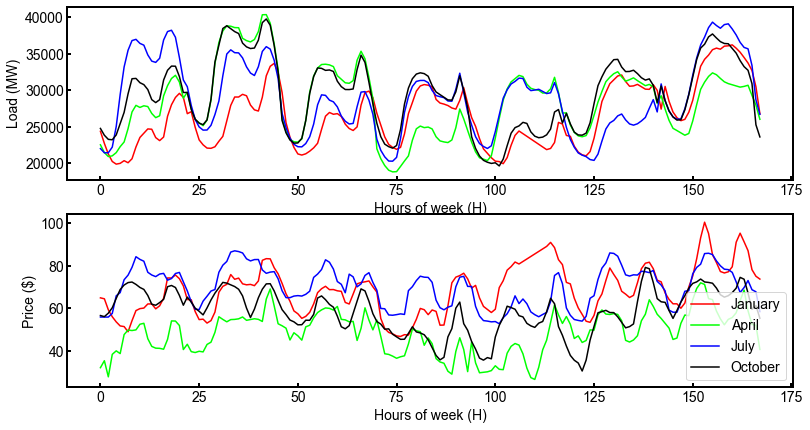

In [6]:
# convert string date and time to datetime
df['time'] = df['time'].apply(lambda x : pd.to_datetime(str(x), utc = True).tz_convert('UTC')) 
init_plot()
plt.figure(figsize=(13,7))
colors = [[1, 0, 0], [0, 1, 0], [0, 0, 1], [0,0,0]]
legend_label= ['January', 'April', 'July', 'October']
months = [1,4,7,10]
count = -1

for month in months:
    df_xdata = pd.DataFrame()
    df_ydata_load = pd.DataFrame()
    df_ydata_price = pd.DataFrame()
    offset = 0;
    count += 1
    for i in [1,2,3,4,5,6,7]: # masking over days of the first week on January
        mask = (df['time'].dt.year == 2015) & (df['time'].dt.month == month) & (df['time'].dt.day == i);
        df_masked = df.loc[mask] 
        df_cur_hour = df_masked['time'].dt.hour
        df_cur_hour += offset 
        df_xdata = pd.concat([df_xdata, df_cur_hour], axis = 0)
        offset += 24 
        df_ydata_load = pd.concat([df_ydata_load, df_masked['total load actual']], axis=0)#concatinating the total load actual values
        df_ydata_price = pd.concat([df_ydata_price, df_masked['price actual']], axis=0)# concatinating the price actual values
    ax1 = plt.subplot(211)
    plt.plot(df_xdata, df_ydata_load, color = colors[count], lw = 1.5)
    ax2 = plt.subplot(212)
    plt.plot(df_xdata, df_ydata_price, color = colors[count], lw = 1.5,)


plt.legend(legend_label)
ax1.set_ylabel('Load (MW)')
ax2.set_ylabel('Price ($)')
ax1.set_xlabel('Hours of week (H)')
ax2.set_xlabel('Hours of week (H)')
plt.savefig('loadpricevshour.png')
#ax.legend([''],loc='upper center', bbox_to_anchor=(0.5, -0.05),
#          fancybox=True, ncol=4 )




# Data visualization using pie chart 
Here, you can see the pie chart showing the electric load generation distribution over all the available resources. 

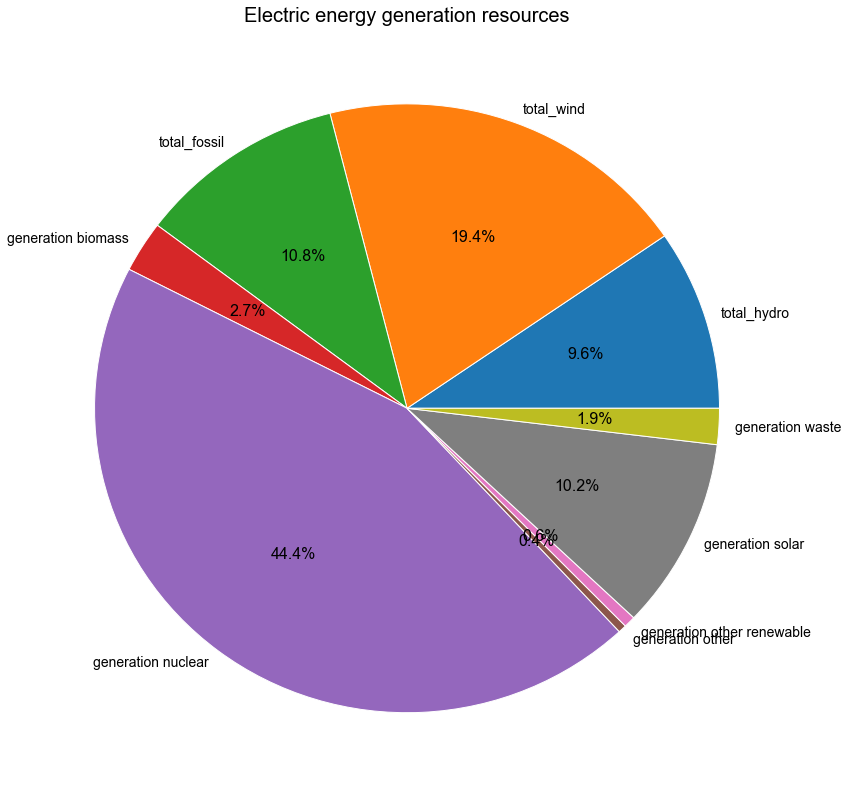

In [7]:
col = list(df1.columns) # list of columns
# making all fossil related energy generation in one list
total_fossil = ['generation fossil brown coal/lignite', 'generation fossil coal-derived gas', 
                'generation fossil gas', 'generation fossil hard coal', 'generation fossil oil',
                'generation fossil oil shale', 'generation fossil peat']
# making all hydro related energy generation in one list
total_hydro = ['generation hydro pumped storage consumption',
               'generation hydro run-of-river and poundage', 
               'generation hydro water reservoir']
# making all wind related energy generation in one list
total_wind = ['generation wind offshore', 
              'generation wind onshore']
# making a dictionary to save all the mean values for the energy generation 
dict_mean = {}
dict_mean['total_hydro'] = df1[total_hydro].mean(axis = 0).values.mean() 
dict_mean['total_wind'] = df1[total_wind].mean(axis = 0).values.mean()
dict_mean['total_fossil'] = df1[total_fossil].mean(axis = 0).values.mean() # taking the mean of all the all_fossil
not_gen_energy = ['time','forecast solar day ahead',
            'forecast wind onshore day ahead','total load forecast',
            'total load actual', 'price day ahead', 'price actual']
df1_rest_energy = [x for x in col if x not in (not_gen_energy + total_hydro+ total_fossil+ total_wind)]
df_rest_energy_mean = df1[df1_rest_energy].mean(axis = 0).to_dict() 

# merging two dictionaries 
dict_mean.update(df_rest_energy_mean)
# removing zeros from dictioanry 
dict_mean = {x:y for x,y in dict_mean.items() if y!=0}

# piechart plot
fig = plt.figure(figsize= [14,14])
ax = fig.add_subplot(111)
pie_wedge_collection = ax.pie(dict_mean.values(), labels = dict_mean.keys(), 
                              autopct='%0.1f%%', labeldistance=1.05)
for pie_wedge in pie_wedge_collection[0]:
    pie_wedge.set_edgecolor('white')
ax.set_title("Electric energy generation resources", fontsize =20);
plt.savefig('piechart.png')


# Using seaborn for data visualization
In this part, I have employed the seaborn package to demonstrate the effect of weather features on the total electric load between years of 2015 to 2018 at Valencia, Spain. 
Some of the results and observations are:
- Probability distribution of the total electric load based on each weather features over the selected hours (i.e. 7am, 1pm, 6pm, and 10 pm) is mapped for the clear visualization on the dataset.  
- It's clear that the probability of load distributions (even at specific time of the day) are compeletly different and it depends on the weather conditions. 
- The distriution are more spreadout **(2000MW- 4000MW)** for the morning and afternoon hours, and it drops to **(2000 MW - 3000MW)** for the late night hours. 
- It's interesting that  **thunderstorm** weather makes the total load higher compared to the other weather conditions. Alos, the distribution has a smaller standarad deviation compared to the other features. 

/Users/sarvenaz/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/sarvenaz/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


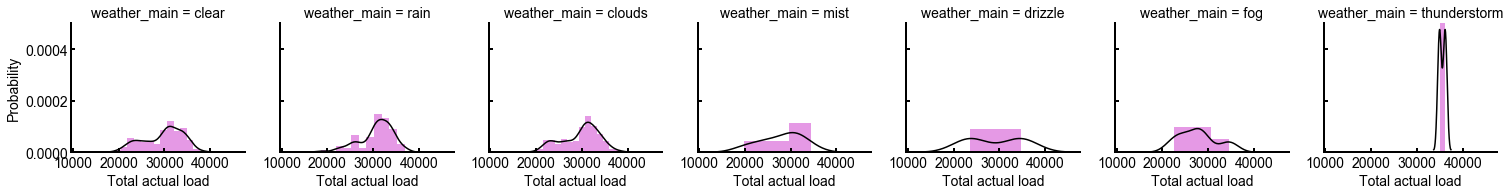

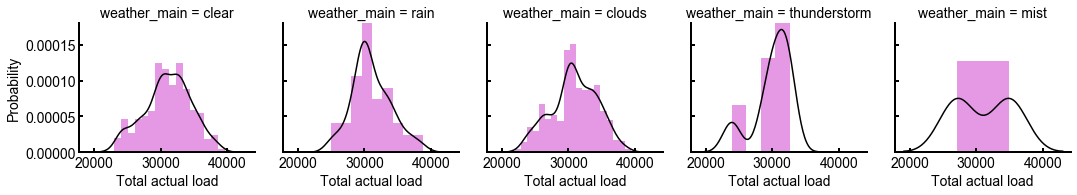

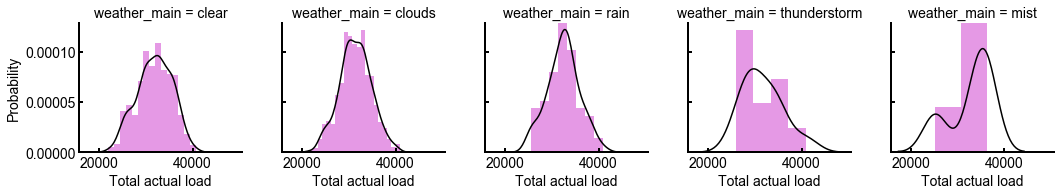

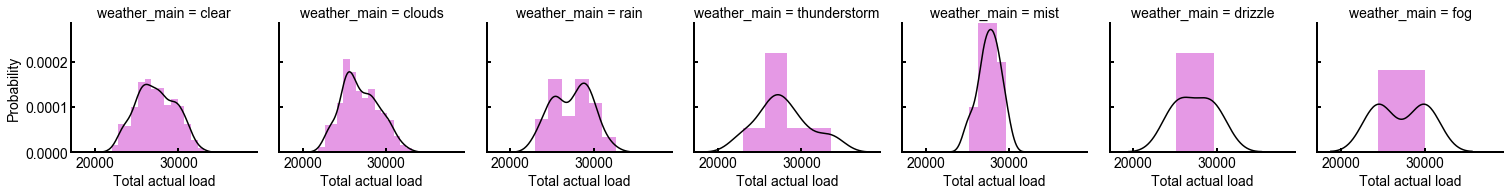

In [9]:
# Cenetering the location of figures at each row  
from IPython.display import display, HTML
display(HTML("""
<style>
.output {
    display: flex;
    align-items: center;
    text-align: center;
}
</style>
"""))
# every row : hours of the day
# ever column :  weather condition
df['time'] = df['time'].apply(lambda x : pd.to_datetime(str(x), utc = True).tz_convert('UTC')) 
hour_select = [7,13,18,22]
for i in range(len(hour_select)):
    # masking dataframe based on the selected hours 
    mask = (df['time'].dt.hour == (hour_select[i])) 
    df_masked = df.loc[mask]
     # ignoring the weather conditions when there is only one value exsit for the weather condition
     #  (otherwise subplots swith empty distribution exist ->only one point)
    for weather_cond in set(df_masked['weather_main']):
        if sum(df_masked['weather_main'] == weather_cond) < 2:
            df_masked = df_masked[df_masked['weather_main'] != weather_cond]

    g = sns.FacetGrid(df_masked, col = 'weather_main')
    g = g.map(sns.distplot, 'total load actual', color = 'm', kde_kws={"color": "k"})
    g.set_axis_labels(x_var="Total actual load", y_var="Probability")
    # saving plots
    plt.savefig('probdist_{}.png'.format(i))



In [5]:
# importing the open source prophet forcasting model
import fbprophet
from fbprophet.diagnostics import cross_validation
mask = (df['time'].dt.year == 2015)
prophet_df = df.loc[mask]
prophet_df = prophet_df.rename(columns = {'time': 'ds0', 'total load actual': 'y'})
prophet_df['ds'] = prophet_df['ds0'].dt.tz_convert(None)
# Generate the model and fit
m = fbprophet.Prophet()
m.fit(prophet_df)


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/Users/sarvenaz/anaconda3/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [ ]:
# cross validation by training 180 days and
df_cv = cross_validation(m, initial='180 days', horizon='5 days')
df_cv.head()


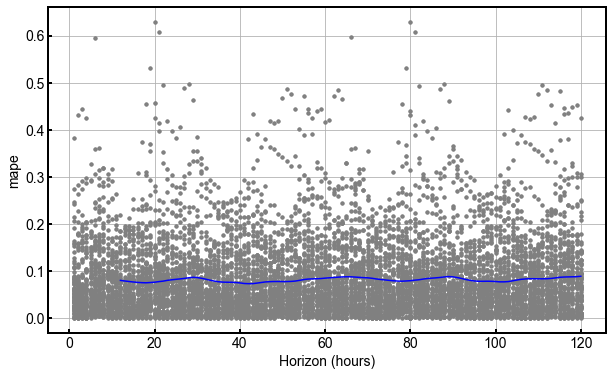

In [9]:
# loading the saved trained data from above cell (Training took a day to complete)
import pickle
with open ('df_cv.pkl', 'rb') as file:
    data = pickle.load(file)
# importing the cross validated data
from fbprophet.diagnostics import performance_metrics  
df_p = performance_metrics(data)
from fbprophet.plot import plot_cross_validation_metric
fig_cv = plot_cross_validation_metric(data, metric='mape')
plt.savefig('fig_cv.png')
